Notebook is copyright &copy; of <a href="https://ajaytech.co">Ajay Tech</a>

# Hello World in Neural Networks

Many times, the MNIST database (a database of handwritten digits) is typically the _Hello World_ application when introducing Neural Networks for the first time. However, we are going to make it even simpler by taking the iris dataset and create a keras based tensorflow Neural Network to classify species. Please refer to <a href="https://ajaytech.co/python-classification/#iris-dataset"> Iris Data </a> to understand more about the dataset we will be working on. You can also refer to <a href="https://ajaytech.co/python-classification"> Classification in Python </a> to understand more about a non-neural network based classification approach to classifying the species in the iris dataset. 

With that background, we are now ready to say _hello_ to Neural Networks using Tensorflow.

In [58]:
import tensorflow as tf
from   tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In the program above, just imported

In [57]:
from sklearn import datasets
iris = datasets.load_iris()

# preview the iris data
print ( iris.data[0:5,:]  ) # data
print ( iris.target[0:5]  ) # target species

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(iris.data , iris.target, test_size=0.2)  

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
[0 0 0 0 0]


In [43]:
model = keras.Sequential()
model.add(keras.layers.Dense(4,input_shape=(4,),activation="relu"))
model.add(keras.layers.Dense(8,activation="relu"))
model.add(keras.layers.Dense(3,activation="softmax"))

In [44]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [45]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_5 (Dense)              (None, 8)                 40        
_________________________________________________________________
dense_6 (Dense)              (None, 3)                 27        
Total params: 87
Trainable params: 87
Non-trainable params: 0
_________________________________________________________________


In [46]:
model.fit(X_train, y_train, epochs=100)

Epoch 1/100
120/120 [==============================] - 0s 438us/sample - loss: 1.5644 - acc: 0.3167
Epoch 2/100
120/120 [==============================] - 0s 33us/sample - loss: 1.5156 - acc: 0.3167
Epoch 3/100
120/120 [==============================] - 0s 37us/sample - loss: 1.4691 - acc: 0.3167
Epoch 4/100
120/120 [==============================] - 0s 33us/sample - loss: 1.4211 - acc: 0.3167
Epoch 5/100
120/120 [==============================] - 0s 33us/sample - loss: 1.3787 - acc: 0.3167
Epoch 6/100
120/120 [==============================] - 0s 45us/sample - loss: 1.3330 - acc: 0.3167
Epoch 7/100
120/120 [==============================] - 0s 37us/sample - loss: 1.2938 - acc: 0.3167
Epoch 8/100
120/120 [==============================] - 0s 33us/sample - loss: 1.2536 - acc: 0.3167
Epoch 9/100
120/120 [==============================] - 0s 29us/sample - loss: 1.2183 - acc: 0.3167
Epoch 10/100
120/120 [==============================] - 0s 54us/sample - loss: 1.1851 - acc: 0.3167
Epoch 11

In [47]:
y_pred = model.predict(X_test)
y_pred

array([[0.01887741, 0.16060711, 0.82051545],
       [0.03691119, 0.31185886, 0.65122986],
       [0.01537503, 0.08960525, 0.8950197 ],
       [0.03616808, 0.30466992, 0.65916204],
       [0.02333074, 0.10949902, 0.8671703 ],
       [0.00953077, 0.06568575, 0.92478347],
       [0.9252594 , 0.05767358, 0.017067  ],
       [0.05844541, 0.7994809 , 0.14207375],
       [0.02723573, 0.37582222, 0.59694207],
       [0.11481637, 0.8107641 , 0.0744195 ],
       [0.08392603, 0.832382  , 0.08369191],
       [0.91986555, 0.06051413, 0.01962033],
       [0.06326912, 0.853422  , 0.08330891],
       [0.0138218 , 0.13229516, 0.8538831 ],
       [0.03680999, 0.30961502, 0.653575  ],
       [0.07495929, 0.701615  , 0.22342573],
       [0.9426259 , 0.0435243 , 0.01384984],
       [0.09072192, 0.82027286, 0.08900525],
       [0.926535  , 0.05544471, 0.01802025],
       [0.06303558, 0.87349606, 0.06346845],
       [0.06839587, 0.6597252 , 0.27187896],
       [0.04008813, 0.35801262, 0.60189927],
       [0.

In [53]:
y_pred_class = np.argmax(y_pred,axis=1)
y_pred_class

array([2, 2, 2, 2, 2, 2, 0, 1, 2, 1, 1, 0, 1, 2, 2, 1, 0, 1, 0, 1, 1, 2,
       0, 2, 0, 1, 2, 2, 2, 0], dtype=int64)

In [56]:
from sklearn.metrics import accuracy_score
 
accuracy_score(y_test,y_pred_class)

0.9333333333333333

In [54]:
from sklearn.metrics import confusion_matrix
 
cm = confusion_matrix(y_test, y_pred_class)
print ( cm )

[[ 7  0  0]
 [ 0  9  2]
 [ 0  0 12]]


In [73]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [85]:
mnist = keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [68]:
train_labels[1:10]

array([0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [69]:
train_images = train_images / 255.0

test_images = test_images / 255.0

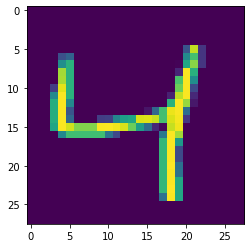

In [75]:
plt.figure()
plt.imshow(train_images[2])

In [46]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

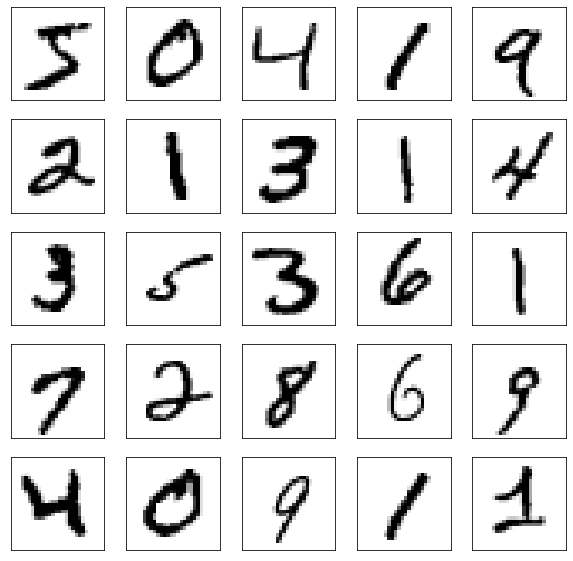

In [84]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(train_images[i], cmap=plt.cm.binary)

In [49]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

In [50]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [51]:
model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
60000/60000 [==============================] - 2s 35us/sample - loss: 0.2617 - acc: 0.9254
Epoch 2/5
60000/60000 [==============================] - 2s 34us/sample - loss: 0.1166 - acc: 0.9653
Epoch 3/5
60000/60000 [==============================] - 2s 34us/sample - loss: 0.0806 - acc: 0.9759
Epoch 4/5
60000/60000 [==============================] - 2s 33us/sample - loss: 0.0589 - acc: 0.9821
Epoch 5/5
60000/60000 [==============================] - 2s 33us/sample - loss: 0.0457 - acc: 0.9861


In [52]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

10000/10000 [==============================] - 0s 23us/sample - loss: 0.0775 - acc: 0.9755
Test accuracy: 0.9755


In [53]:
predictions = model.predict(test_images)

In [54]:
predictions[0]

array([1.3607456e-07, 8.0211411e-09, 1.5221176e-06, 1.2480983e-04,
       5.2185273e-10, 9.2426241e-08, 6.1016958e-13, 9.9986899e-01,
       7.8800873e-08, 4.3292384e-06], dtype=float32)

In [55]:
np.argmax(predictions[0])

7

In [56]:
test_labels[0]

7

In [57]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  
  plt.imshow(img, cmap=plt.cm.binary)
  
  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)
  
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

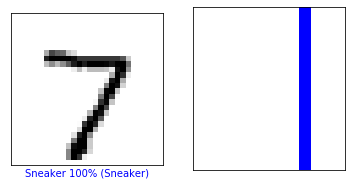

In [58]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()

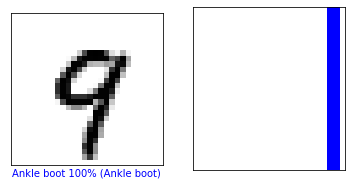

In [59]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()

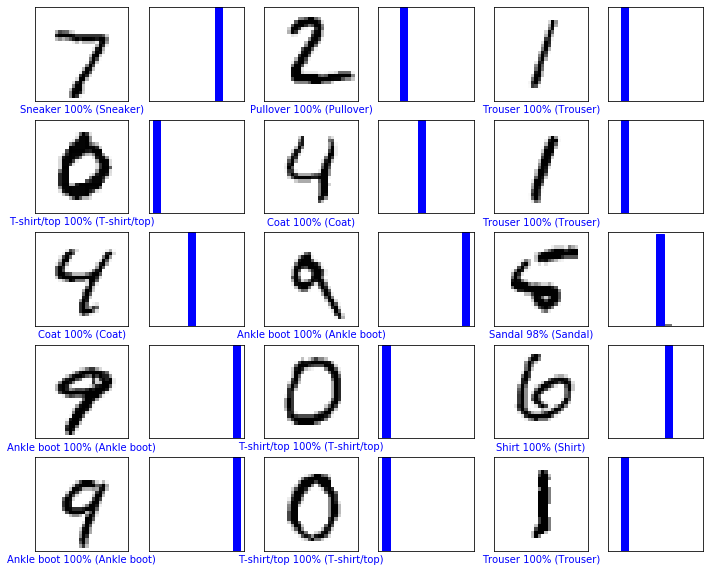

In [61]:
# Plot the first X test images, their predicted label, and the true label
# Color correct predictions in blue, incorrect predictions in red
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)
plt.show()

In [62]:
# Grab an image from the test dataset
img = test_images[0]

print(img.shape)

(28, 28)


In [63]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [64]:
predictions_single = model.predict(img)

print(predictions_single)

[[1.3607443e-07 8.0211411e-09 1.5221176e-06 1.2480983e-04 5.2185273e-10
  9.2426419e-08 6.1016958e-13 9.9986899e-01 7.8800724e-08 4.3292384e-06]]


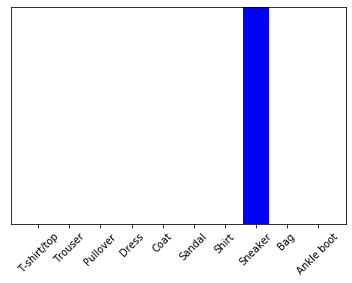

In [65]:
plot_value_array(0, predictions_single, test_labels)
plt.xticks(range(10), class_names, rotation=45)
plt.show()

In [66]:
prediction_result = np.argmax(predictions_single[0])
print(prediction_result)

7
